In [1]:
import pandas as pd
import os

def merge_csv_files(input_dir, output_file):
    csv_files = []
    # walk through all files in the input_dir
    for root, dirs, files in os.walk(input_dir): 
        for file in files:
            if file.endswith('.csv'):
                # save not only the file name, but the full path
                file_path = os.path.join(root, file)
                csv_files.append(file_path)
                print(f'Found csv file: {file_path}')

    print(f'Merging {len(csv_files)} csv files')

    # combine all csv files
    dfs = []
    for csv_file in csv_files:
        df = pd.read_csv(os.path.join(input_dir, csv_file))
        dfs.append(df)
    # combine all dataframes, delete duplicates (if we have a csv files thats already a merge of multiple csv files, we might have duplicates)
    combined_df = pd.concat(dfs).drop_duplicates()

    # save to output file
    combined_df.to_csv(output_file, index=False)

In [ ]:
# can be called locally, to aggregate all decode runs of one experiment
# or just on the whole experiments dir, to aggregate all experiments, for the final analysis

merge_csv_files('/fast/mkaut/ma-thesis/experiments/gs/flux/mjprompts/num_1000_steps_50_fpr_0.01_gdscale_3.0/decode_imgs/logs', 
                '/fast/mkaut/ma-thesis/experiments/gs/flux/mjprompts/num_1000_steps_50_fpr_0.01_gdscale_3.0/decode_imgs/results_decode_merged.csv')

Found csv file: /is/sg2/mkaut/ma-thesis/experiments/gs/sd/mjprompts/num_5_steps_50_fpr_0.01_gdscale_3.0/results_decode_merged.csv
Found csv file: /is/sg2/mkaut/ma-thesis/experiments/gs/sd/mjprompts/num_5_steps_50_fpr_0.01_gdscale_3.0/decode_imgs/logs/2025-02-19_16-31-07_cropscale/results_cropscale.csv
Found csv file: /is/sg2/mkaut/ma-thesis/experiments/gs/sd/mjprompts/num_5_steps_50_fpr_0.01_gdscale_3.0/decode_imgs/logs/2025-02-19_16-47-21_noise/results_noise.csv
Found csv file: /is/sg2/mkaut/ma-thesis/experiments/gs/sd/mjprompts/num_5_steps_50_fpr_0.01_gdscale_3.0/decode_imgs/logs/2025-02-20_11-29-48_jpeg/results_jpeg.csv
Found csv file: /is/sg2/mkaut/ma-thesis/experiments/prc/sd/mjprompts/num_5_steps_50_fpr_0.01_gdscale_3.0/results_decode_merged.csv
Found csv file: /is/sg2/mkaut/ma-thesis/experiments/prc/sd/mjprompts/num_5_steps_50_fpr_0.01_gdscale_3.0/decode_imgs/logs/2025-02-20_11-47-19_jpeg/results_jpeg.csv
Found csv file: /is/sg2/mkaut/ma-thesis/experiments/prc/sd/mjprompts/num_5

In [7]:
results_df = pd.read_csv('/is/sg2/mkaut/ma-thesis/experiments/num_5_steps_50_fpr_0.01_gdscale_3.0_results_decode_merged.csv')

# dict for saving names of axes/values
attack_names_lut = {
    'crop_scale': {
        'name': 'Crop&Scale',
        'x_axis': 'Crop ratio and scale ratio',
    },
    'jpeg_ratio': {
        'name': 'JPEG',
        'x_axis': 'Quality factor', 
    },
    'gaussian_std': {
        'name': 'Noise',
        'x_axis': 'Standard deviation',
    },
    'r_degree': {
        'name': 'Rotate',
        'x_axis': 'Angle',
    },
    'gaussian_blur_r': {
        'name': 'Blur',
        'x_axis': 'Radius',
    },
    'brightness_factor': {
        'name': 'Brightness',
        'x_axis': 'Factor',
    },
    'adv_surr_resnet18': {
        'name': 'Adv. Surrogate RN18',
        'x_axis': 'eps = x/255',
    },
    'adv_surr_resnet50': {
        'name': 'Adv. Surrogate RN50',
        'x_axis': 'eps = x/255',
    },
    'adv_embed_klvae8': {	
        'name': 'Adv. Embed KLVAE8',
        'x_axis': 'eps = x/255',
    },
    'adv_embed_klvae16': {
        'name': 'Adv. Embed KLVAE16',
        'x_axis': 'eps = x/255',
    },
    'adv_embed_resnet18': {
        'name': 'Adv. Embed RN18',
        'x_axis': 'eps = x/255',
    },
    'adv_embed_resnet50': {
        'name': 'Adv. Embed RN50',
        'x_axis': 'eps = x/255',
    },
    'adv_embed_resnet101': {
        'name': 'Adv. Embed RN101',
        'x_axis': 'eps = x/255',
    },
    'adv_embed_sdxlvae': {
        'name': 'Adv. Embed SDXLVAE',
        'x_axis': 'eps = x/255',
    }
}



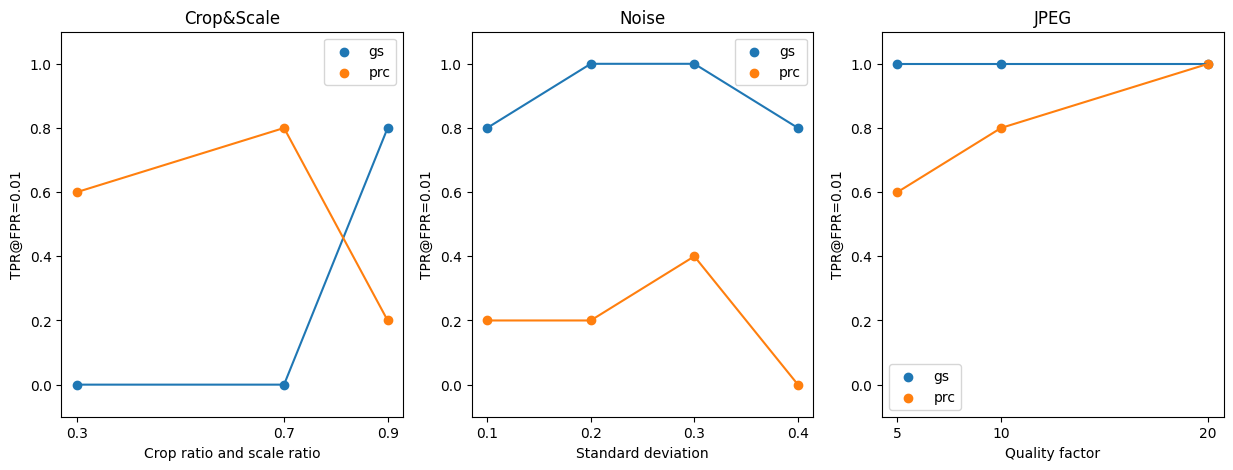

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# the df has the following columns:
# wm_method	model_id	dataset_id	attack_type	attack_name	attack_strength	tpr_empirical	auc	acc	tpr_analytical	tpr_decode	tpr_traceability	threshold	mean_wm_dist	mean_no_wm_dist	clip_score_wm	clip_score_nowm	fid_score_wm	fid_score_nowm
#

# create subplots for each attack name, with x axes strength and y axis tpr_empirical
# then , in each attack-plot, plot the tpr_empirical for each wm_method, as a line (with x points) with different color per wm_method,

set_fpr = 0.01
attack_names = results_df['attack_name'].unique()
wm_methods = results_df['wm_method'].unique()

fig, axs = plt.subplots(1, len(attack_names), figsize=(5*len(attack_names), 5))

for i, attack_name in enumerate(attack_names):
    attack_df = results_df[results_df['attack_name'] == attack_name]
    for wm_method in wm_methods:
        wm_df = attack_df[attack_df['wm_method'] == wm_method]
        axs[i].plot(wm_df['attack_strength'], wm_df['tpr_empirical'])
        axs[i].scatter(wm_df['attack_strength'], wm_df['tpr_empirical'], label=wm_method)
    axs[i].set_title(attack_names_lut[attack_name]['name'])
    axs[i].legend()
    axs[i].set_xlabel(attack_names_lut[attack_name]['x_axis'])
    axs[i].set_ylabel(f'TPR@FPR={set_fpr}')
    # always have the y axes from 0 to 1
    axs[i].set_ylim([-0.1, 1.1])
    # and the x ticks as the wm_df['attack_strength'] values
    axs[i].set_xticks(wm_df['attack_strength'])

plt.show()

